<a href="https://colab.research.google.com/github/Sungjinwoocult/Google-Colab-repo/blob/main/extra_activity_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hicolab
import pandas as pd

df=pd.read_csv("pokemon.csv")
print(df[['Name', 'Type 1', 'Type 2']].head())

                    Name Type 1  Type 2
0              Bulbasaur  Grass  Poison
1                Ivysaur  Grass  Poison
2               Venusaur  Grass  Poison
3  VenusaurMega Venusaur  Grass  Poison
4             Charmander   Fire     NaN


In [ ]:
# Dual-type Pokémon have a non-null Type 2
dual_type_count = df['Type 2'].notna().sum()
single_type_count = df['Type 2'].isna().sum()
total = df['#'].nunique()

# Calculate probability of dual-typing
p_dual = dual_type_count / total

print("Dual-type pokemon:", dual_type_count)
print("Single-type pokemon:", single_type_count)
print("Total pokemon:", total)
print("Probability of dual-type (p):",p_dual)

Dual-type pokemon: 414
Single-type pokemon: 386
Total pokemon: 721
Probability of dual-type (p): 0.5742024965325936


In [ ]:
# Drop duplicates by Pokédex number (keep the first occurrence)
unique_pokemon = df.drop_duplicates(subset='#')

# Then count dual-types and single-types from this filtered set
dual_type_count = unique_pokemon['Type 2'].notna().sum()
single_type_count = unique_pokemon['Type 2'].isna().sum()
total = unique_pokemon['#'].nunique()  # or just len(unique_pokemon)

p_dual = dual_type_count / total

print("Dual-type pokemon:", dual_type_count)
print("Single-type pokemon:", single_type_count)
print("Total pokemon:", total)
print("Probability of dual-type (p):", p_dual)


Dual-type pokemon: 350
Single-type pokemon: 371
Total pokemon: 721
Probability of dual-type (p): 0.4854368932038835


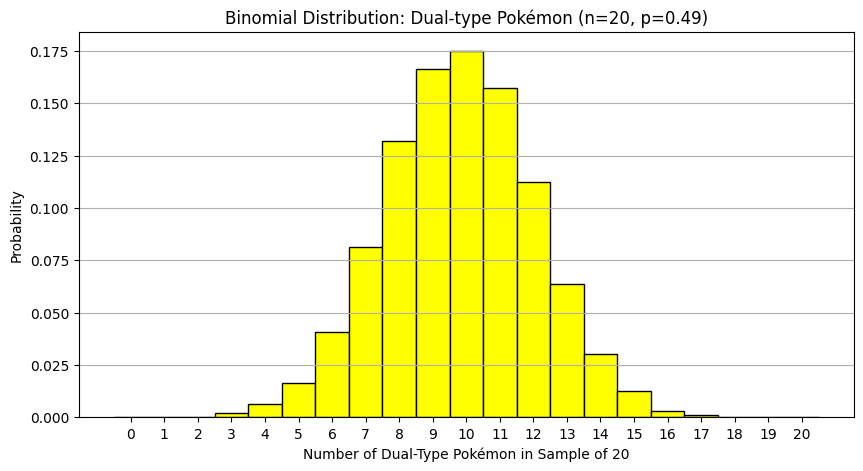

x	Binomial PMF
0	0.000001
1	0.000027
2	0.000249
3	0.001433
4	0.005851
5	0.017988
6	0.043206
7	0.083023
8	0.129622
9	0.166051
10	0.175494
11	0.153283
12	0.110454
13	0.065306
14	0.031373
15	0.012057
16	0.003620
17	0.000818
18	0.000131
19	0.000013
20	0.000001


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 20  # sample size (number of Pokémon picked)
p = p_dual  # use your corrected probability
num_trials = 10000  # number of simulations
from scipy.stats import binom

n = 20
p = 0.49
binomial_pmf = [binom.pmf(k, n, p) for k in range(n + 1)]

# Simulate binomial distribution
samples = np.random.binomial(n=n, p=p, size=num_trials)

# Plot the distribution
plt.figure(figsize=(10, 5))
plt.hist(samples, bins=np.arange(n+2)-0.5,  color='yellow', edgecolor='black', density=True)
plt.title(f'Binomial Distribution: Dual-type Pokémon (n={n}, p={p:.2f})')
plt.xlabel('Number of Dual-Type Pokémon in Sample of 20')
plt.ylabel('Probability')
plt.xticks(range(n+1))
plt.grid(axis='y')
plt.show()
# Display Experimental PMF
print("x\tBinomial PMF")
for i in range(n+1):

    bin_prob = binomial_pmf[i]
    print(f"{i}\t{bin_prob:.6f}")


In [ ]:
# Load your CSV

df = pd.read_csv("pokemon.csv")

# Select only needed columns
df_small = df[['#','Name', 'Type 1', 'Type 2']]

# Save to a new CSV
df_small.to_csv("pokemon_types.csv", index=False)

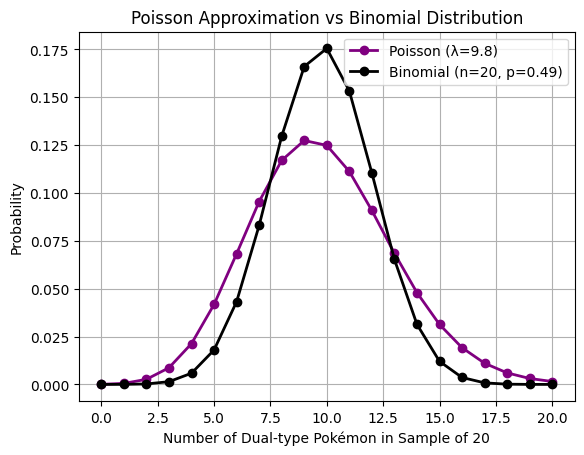

In [ ]:
import matplotlib.pyplot as plt

# Plot Poisson
plt.plot(x, poisson_pmf, 'o-', color='purple', label='Poisson (λ=9.8)', linewidth=2)

# Plot previously calculated Binomial (if you have it)
plt.plot(x, binom.pmf(x, n, p), 'o-', color='black', label='Binomial (n=20, p=0.49)', linewidth=2)

plt.xlabel("Number of Dual-type Pokémon in Sample of 20")
plt.ylabel("Probability")
plt.title("Poisson Approximation vs Binomial Distribution")
plt.legend()
plt.grid(True)
plt.show()


P(X = 0) = 0.00006
P(X = 1) = 0.00054
P(X = 2) = 0.00266
P(X = 3) = 0.00870
P(X = 4) = 0.02131
P(X = 5) = 0.04177
P(X = 6) = 0.06822
P(X = 7) = 0.09551
P(X = 8) = 0.11700
P(X = 9) = 0.12740
P(X = 10) = 0.12486
P(X = 11) = 0.11124
P(X = 12) = 0.09084
P(X = 13) = 0.06848
P(X = 14) = 0.04794
P(X = 15) = 0.03132
P(X = 16) = 0.01918
P(X = 17) = 0.01106
P(X = 18) = 0.00602
P(X = 19) = 0.00311
P(X = 20) = 0.00152


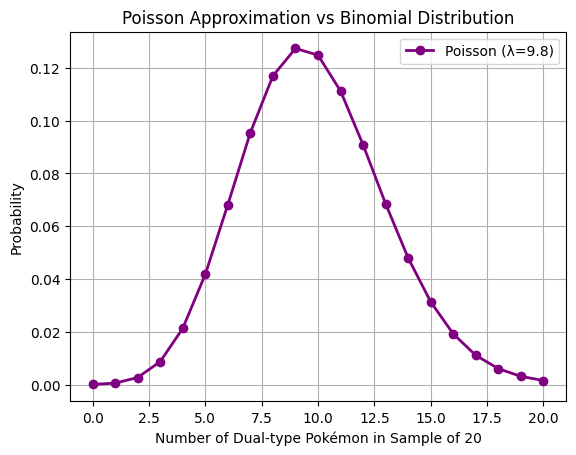

In [ ]:
from scipy.stats import poisson
import numpy as np

lambda_ = 9.8
x = np.arange(0, 21)
poisson_pmf = poisson.pmf(x, mu=lambda_)

# Optional: print each probability
for i in x:
    print(f"P(X = {i}) = {poisson.pmf(i, mu=lambda_):.5f}")

import matplotlib.pyplot as plt

# Plot Poisson
plt.plot(x, poisson_pmf, 'o-', color='purple', label='Poisson (λ=9.8)', linewidth=2)

# Plot previously calculated Binomial (if you have it)
# plt.plot(x, binom.pmf(x, n, p), 'o-', color='black', label='Binomial (n=20, p=0.49)', linewidth=2)

plt.xlabel("Number of Dual-type Pokémon in Sample of 20")
plt.ylabel("Probability")
plt.title("Poisson Approximation vs Binomial Distribution")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from scipy.stats import poisson

# Parameters
n = 20
p = 0.49
lam = n * p  # λ = np = 9.8

# Generate Poisson PMF values for x = 0 to 20
print("x (Dual-type Count)\tPoisson P(X = x)")
for x in range(n + 1):
    prob = poisson.pmf(x, mu=lam)
    print(f"{x}\t\t\t{prob:.5f}")


x (Dual-type Count)	Poisson P(X = x)
0			0.00006
1			0.00054
2			0.00266
3			0.00870
4			0.02131
5			0.04177
6			0.06822
7			0.09551
8			0.11700
9			0.12740
10			0.12486
11			0.11124
12			0.09084
13			0.06848
14			0.04794
15			0.03132
16			0.01918
17			0.01106
18			0.00602
19			0.00311
20			0.00152


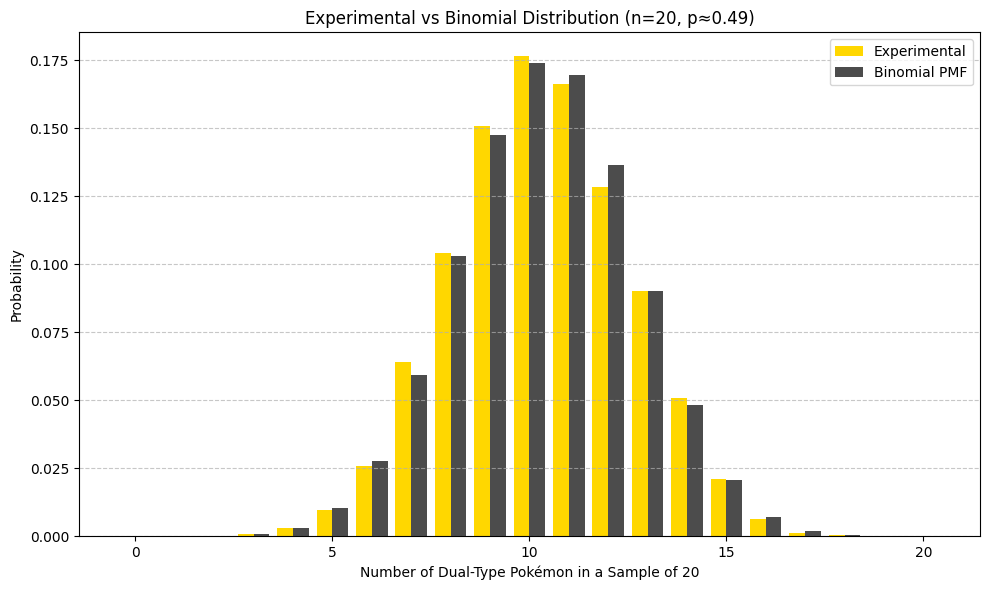

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

# Load your Pokémon dataset
df = pd.read_csv("pokemon_types.csv")  # Replace with your filename

# Count how many unique Pokémon are there
unique_pokemon = df.drop_duplicates(subset='Name')

# Experimental data: Count how many are dual type
dual_count = unique_pokemon['Type 2'].notnull().sum()
single_count = unique_pokemon['Type 2'].isnull().sum()
total_pokemon = dual_count + single_count

# Probability of dual-type
p = dual_count / total_pokemon  # This should be ~0.49

# Parameters for Binomial Distribution
n = 20
x = np.arange(0, n+1)
binomial_pmf = binom.pmf(x, n, p)

# Simulate experiment: Choose 10,000 samples of 20 Pokémon and count dual-types
samples = np.random.choice([1, 0], size=(10000, n), p=[p, 1-p])
experiment_counts = samples.sum(axis=1)

# Frequency distribution of experimental results
exp_freq = np.bincount(experiment_counts, minlength=n+1) / 10000

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, exp_freq, width=0.4, label='Experimental', color='gold')
plt.bar(x + 0.2, binomial_pmf, width=0.4, label='Binomial PMF', color='black', alpha=0.7)
plt.xlabel('Number of Dual-Type Pokémon in a Sample of 20')
plt.ylabel('Probability')
plt.title('Experimental vs Binomial Distribution (n=20, p≈0.49)')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
